# **IMPORTING LIBRARIES**

In [ ]:
from tensorflow import keras
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow
from numpy.random import seed
seed(1337)
import datetime
import time
#from tensorflow import set_random_seed
#set_random_seed(42)
tensorflow.random.set_seed(42)
from tensorflow.keras import optimizers
#from tensorflow.keras.optimizers import Adam
from keras.optimizers import Adam
#from keras.optimizers import Adam
from tensorflow.keras.applications import vgg16
# from tensorflow.keras.applications.mobilenet_v3 import mobileNetV3
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img,img_to_array
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau, CSVLogger
from keras import layers, models, Model, optimizers
from imblearn.over_sampling import SMOTE

from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 

import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
physical_devices = tf.config.list_physical_devices("GPU")
print(physical_devices)

from tensorflow.keras import layers, models, Model, optimizers
from tensorflow.keras import regularizers
from tensorflow.python.keras.layers import Dropout
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from tensorflow.keras.utils import get_custom_objects
from tensorflow.python.keras.layers import LeakyReLU
from tensorflow.keras.layers import Activation
from tensorflow.keras.backend import sigmoid
#from plot_confusion_matrix import plot_confusion_matrix
print("All libraries are imported")

All libraries are imported


# **DATA COLLECTION**

In [ ]:
train_data_dir = "C:/DUAEFATIMA/work8/Datasets/DR-APTOS/train/"
print(" training directory found")
                                                                                                                                                                                                                                            
val_data_dir = "C:/DUAEFATIMA/work8/Datasets/DR-APTOS/valid/"
print(" validation directory found")

# test_data_dir = "C:/DUAEFATIMA/work8/Datasets/DR-APTOS/test/"
# print(" test directory found")

category_names = sorted(os.listdir("C:/DUAEFATIMA/work8/Datasets/DR-APTOS/train/"))
print(category_names)

# print("test data samples",len(test_data_dir))
# nb_categories = len(category_names)
# print(nb_categories)

img_pr_val =[]
img_pr_test =[]
img_pr_cat=[]

for category in category_names:
    #folder = '/home/ubuntuos/Documents/Diabetic Retinopathy/Augmented data/train/' + '/' + category
    folderTrain = 'C:/DUAEFATIMA/work8/Datasets/DR-APTOS/train'+ '/'+ category
    img_pr_cat.append(len(os.listdir(folderTrain)))
    folderValidation = 'C:/DUAEFATIMA/work8/Datasets/DR-APTOS/valid' + '/' + category
    img_pr_val.append(len(os.listdir(folderValidation)))
#     folderTest = test_data_dir + '/' + category
#     img_pr_test.append(len(os.listdir(folderTest)))


 training directory found
 validation directory found
['Nrdr', 'Rdr']


# **IMPLEMENTATION OF NEURAL NETWORK**

In [ ]:
image_size = 224
IMG_SHAPE = (image_size, image_size, 3)

#Create the base model from the pre-trained model mobilenetv2
model=Sequential()
  
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=IMG_SHAPE))
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))

# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
# model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
# base_model = tf.keras.applications.MobileNetV2(input_shape=IMG_SHAPE,
#                                               include_top=False,
#                                               alpha=1.0,
#                                               weights='imagenet')

#base_model.summary()

#  **OPTIMIZATION OF NEURAL NETWORK**

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001,
                                                beta_1=0.9,
                                                beta_2=0.999,
                                                epsilon=1e-07,
                                                #amsgrad=False,
                                               ),
              loss='binary_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_17 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 112, 112, 32)     0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 401408)            0         
                                                                 
 dense_6 (Dense)             (None, 8)                 3211272   
                                                                 
 dense_7 (Dense)             (None, 1)                 9         
                                                      

In [ ]:
img_height, img_width = 224,224
# the no. imgaes to load at each iteration
batch_size = 32
# only rescaling
train_datagen =  ImageDataGenerator(
    rescale=1./255,
    zoom_range=0.2,
    #brightness_range=[0.8,1.0],
    featurewise_center=True,
    featurewise_std_normalization=True
)
test_datagen =  ImageDataGenerator(
    rescale=1./255,
   #brightness_range=[0.8,1.0], 
    featurewise_center=True,
    featurewise_std_normalization=True
)
# these are generators for train/test data that will read pictures #found in the defined subfolders of 'data/'
print('Total number of images for "training":')

train_generator = train_datagen.flow_from_directory(
train_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size, 
class_mode = "binary",
    shuffle = True
    #,color_mode='grayscale'
)
total_train = train_generator.n

#train_generator = train_generator.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
print('Total number of images for "validation":')
val_generator = test_datagen.flow_from_directory(
val_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "binary"
    ,#color_mode='grayscale',
shuffle=True
)
total_val = val_generator.n
print('Total number of images for "testing":')
test_generator = test_datagen.flow_from_directory(
test_data_dir,
target_size = (img_height, img_width),
batch_size = batch_size,
class_mode = "binary"
    ,#color_mode='grayscale',
shuffle=True)

Total number of images for "training":
Found 4200 images belonging to 2 classes.
Total number of images for "validation":
Found 1200 images belonging to 2 classes.
Total number of images for "testing":
Found 600 images belonging to 1 classes.


# **TRAINING OF MODEL**

In [ ]:

start = datetime.datetime.now()

# main_model_dir= r"C:/DUAEFATIMA/output/"
# model_dir = main_model_dir + time.strftime('%Y-%m-%d %H-%M-%S') + "/"
# model_file = model_dir + "{epoch:02d}-val_accuracy-{val_accuracy:.2f}-val_loss-{val_loss:.2f}.hdf5"

#save_weights_only=False

epochs = 50
checkpoint = ModelCheckpoint( "C:/DUAEFATIMA/fyp_miss_fauzia/model.h5",
                             monitor = 'val_accuracy', 
                             verbose=1, save_weights_only=False, 
                             save_best_only=True, mode='max', period=1)

early = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=50, verbose=1, mode='max', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', 
                                    factor=0.1,
                                    patience=1,
                                    verbose=1,
                                    mode="auto",
                                    min_delta=0.0001,
                                    cooldown=0,
                                    min_lr=0.001)
# steps_per_epoch = 
# validation_steps = 100
csv_logger = CSVLogger('C:/DUAEFATIMA/fyp_miss_fauzia/model.csv', separator=',')


print("Training Started at: ",start)
history = model.fit(train_generator,
                              #steps_per_epoch = 1,
                              epochs=epochs,
                              workers=24,
                              #validation_steps=1,
                              validation_data=val_generator, verbose = 1,callbacks = [csv_logger,early, reduce_lr,checkpoint]
                               #validation_data=val_generator, verbose = 1,callbacks = [early, reduce_lr,checkpoint]
                             )
end = datetime.datetime.now()
elapsed= end-start
print ("Time: ", elapsed)

Training Started at:  2023-02-23 10:33:01.772236
Epoch 1/50
132/132 [==============================] - ETA: 0s - loss: 0.5143 - accuracy: 0.7417
Epoch 1: val_accuracy improved from -inf to 0.73667, saving model to C:/DUAEFATIMA/fyp_miss_fauzia\model.h5
132/132 [==============================] - 68s 490ms/step - loss: 0.5143 - accuracy: 0.7417 - val_loss: 0.5130 - val_accuracy: 0.7367 - lr: 1.0000e-04
Epoch 2/50
132/132 [==============================] - ETA: 0s - loss: 0.5020 - accuracy: 0.7436
Epoch 2: val_accuracy improved from 0.73667 to 0.75417, saving model to C:/DUAEFATIMA/fyp_miss_fauzia\model.h5
132/132 [==============================] - 65s 464ms/step - loss: 0.5020 - accuracy: 0.7436 - val_loss: 0.4933 - val_accuracy: 0.7542 - lr: 1.0000e-04
Epoch 3/50
132/132 [==============================] - ETA: 0s - loss: 0.4789 - accuracy: 0.7579
Epoch 3: val_accuracy did not improve from 0.75417
132/132 [==============================] - 63s 456ms/step - loss: 0.4789 - accuracy: 0.7579

# **GRAPHICAL REPRESENTATION**

for key in historyCallback.history:
    print(key)

In [ ]:
#model.save("C:/DUAEFATIMA/work_6/models_experiments/mobilenetv2/mobilnetv2_hybrid_copy_32.h5")

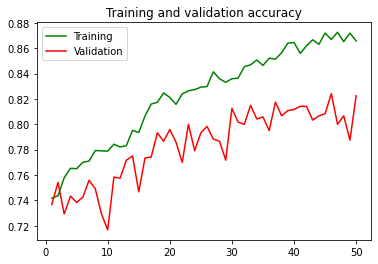

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,len(acc)+1)
legends = ['Training', 'Validation']

plt.plot(epochs, acc, 'g', label = 'Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(legends, loc='upper left')
plt.savefig('C:/DUAEFATIMA/fyp_miss_fauzia/model_acc.jpg')

# plt.plot(epochs, loss, 'g', label = 'Training loss')
# plt.plot(epochs, val_loss, 'y', label='Validation loss')

# plt.savefig('C:/DUAEFATIMA/Loss.jpg')

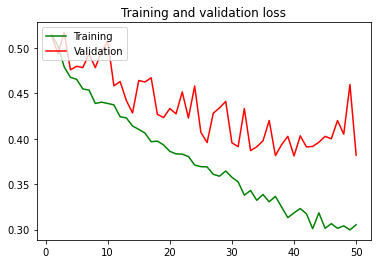

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
legends = ['Training', 'Validation']
epochs = range(1,len(acc)+1)
plt.plot(epochs, loss, 'g', label = 'Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(legends, loc='upper left')
plt.savefig('C:/DUAEFATIMA/fyp_miss_fauzia/model_loss.jpg')

# **ACCURACY OBTAINED IN TEST SET**

In [ ]:
accuracy = accuracy_score(test_generator.classes, binary)
print("Accuracy in test set: %0.1f%% " % (accuracy * 100))

Accuracy in test set: 77.0% 
